# Notebook crash analysis 

## Manual labels of the sampled errors

In [1]:
# import importlib
# importlib.reload(config)
# import config

## Prepare data

In [1]:
import pandas as pd
import config
import visualization_util

# summed data and config
# config
df_mlerr_label_config_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_config_sum.xlsx'),
                                keep_default_na=False)
exclude_config = ["label_if_error_chain"] # because it is the same as root cause==nb specific-previous cell error
df_mlerr_label_config_sum.drop(exclude_config, axis=1, inplace=True)
# data
df_mlerr_labels_g_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_g_sum.xlsx'))
df_mlerr_labels_k_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_k_sum.xlsx'))

# before filtering
print(df_mlerr_labels_g_sum.eid.nunique())
print(df_mlerr_labels_k_sum.eid.nunique())

exclude_other = ['should exclude'] #[should exclude']
exclude_ml_pipeline_sum = []#['not applicable','unknown']
df_mlerr_labels_g_sum = df_mlerr_labels_g_sum[(~df_mlerr_labels_g_sum.label_ML_pipeline.isin(exclude_ml_pipeline_sum))&(~df_mlerr_labels_g_sum.other.isin(exclude_other))]
df_mlerr_labels_k_sum = df_mlerr_labels_k_sum[(~df_mlerr_labels_k_sum.label_ML_pipeline.isin(exclude_ml_pipeline_sum))&(~df_mlerr_labels_k_sum.other.isin(exclude_other))]

# after filtering
print(df_mlerr_labels_g_sum.eid.nunique())
print(df_mlerr_labels_k_sum.eid.nunique())

path_default=WindowsPath('C:/Users/yirwa29/Downloads/Dataset-Nb')
390
356
389
354


In [2]:
# Summarize the statistics based on - df_mlerr_labels_sum
# github stats
cluster_res_g_sum = visualization_util.statistics_labels(df_mlerr_label_config_sum, df_mlerr_labels_g_sum)
for label_key in df_mlerr_label_config_sum:
    cluster_res_g_sum[label_key] = pd.DataFrame.from_dict(cluster_res_g_sum[label_key]).rename_axis('cluster_id').reset_index()
# for all clusters    
cluster_res_g_sum_weighted_sum = visualization_util.cal_weighted_sum(df_mlerr_label_config_sum, cluster_res_g_sum)

# kaggle stats
cluster_res_k_sum = visualization_util.statistics_labels(df_mlerr_label_config_sum, df_mlerr_labels_k_sum)
for label_key in df_mlerr_label_config_sum:
    cluster_res_k_sum[label_key] = pd.DataFrame.from_dict(cluster_res_k_sum[label_key]).rename_axis('cluster_id').reset_index()
cluster_res_k_sum_weighted_sum = visualization_util.cal_weighted_sum(df_mlerr_label_config_sum, cluster_res_k_sum)

In [3]:
# before sum data and config
df_mlerr_label_config = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_config.xlsx'),
                                keep_default_na=False)
exclude_config = ["label_if_error_chain"] # because it is the same as root cause==nb specific-previous cell error
df_mlerr_label_config.drop(exclude_config, axis=1, inplace=True)
# data
df_mlerr_labels_g = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_g.xlsx'))
df_mlerr_labels_k = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_k.xlsx'))

# before filtering
print(df_mlerr_labels_g.eid.nunique())
print(df_mlerr_labels_k.eid.nunique())

# exclude_ml_pipeline = ['not-applicable (sub-labels needed, e.g., tutorials, physics simulation, ..)',
#                        'not applicable - tutorial notebook',
#                        'not applicable - physics',
#                        'not applicable - education',
#                        'unknown']
exclude_ml_pipeline=[]
exclude_other = ['should exclude']
df_mlerr_labels_g = df_mlerr_labels_g[(~df_mlerr_labels_g.label_ML_pipeline.isin(exclude_ml_pipeline))&(~df_mlerr_labels_g.other.isin(exclude_other))]
df_mlerr_labels_k = df_mlerr_labels_k[(~df_mlerr_labels_k.label_ML_pipeline.isin(exclude_ml_pipeline))&(~df_mlerr_labels_k.other.isin(exclude_other))]

# after filtering
print(df_mlerr_labels_g.eid.nunique())
print(df_mlerr_labels_k.eid.nunique())

390
356
389
354


## Visualizations

Define colors 

[cmap](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

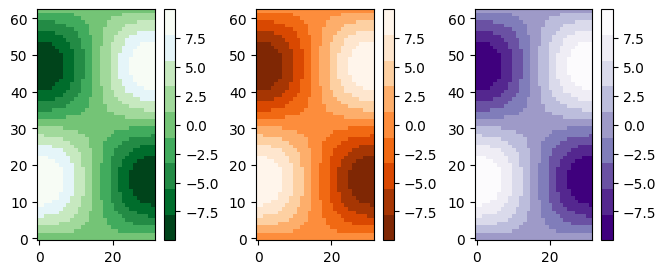

In [4]:
# define cmap with RGB values

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

# green
mycolors = np.array([
    [247,252,245],
    [229,245,249],
    [199,233,192],
    [161,217,155],
    [116,196,118],
    [65,171,93],
    [35,139,69],
    [0,109,44],
    [0,68,27]])/255

# orange
mycolors_2 = np.array([
    [255,245,235],
    [254,230,206],
    [253,208,162],
    [253,174,107],
    [253,141,60],
    [241,105,19],
    [217,72,1],
    [166,54,3],
    [127,39,4]])/255

# purple
mycolors_3 = np.array([
    [252,251,253],
    [239,237,245],
    [218,218,235],
    [188,189,220],
    [158,154,200],
    [128,125,186],
    [106,81,163],
    [84,39,143],
    [63,0,125]])/255

cm = LinearSegmentedColormap.from_list('mycolors', mycolors[::-1], N=len(mycolors))
cm_2 = LinearSegmentedColormap.from_list('mycolors_2', mycolors_2[::-1], N=len(mycolors_2))
cm_3 = LinearSegmentedColormap.from_list('mycolors_3', mycolors_3[::-1], N=len(mycolors_3))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

for ax, cm_apply in zip(axs.flat, [cm, cm_2, cm_3]):
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm_apply)
    plt.colorbar(im)
plt.show()

### rq1: What are the prevalent exception types and root causes in ML/data science notebooks?

In [5]:
# exception types
# top 10 + other (remainings)

cluster_res_exp_type_sum_weighted_sum = {x: cluster_res_k_sum_weighted_sum['label_refined_exp_type'].get(x, 0) + cluster_res_g_sum_weighted_sum['label_refined_exp_type'].get(x, 0)
                                         for x in set(cluster_res_k_sum_weighted_sum['label_refined_exp_type']).union(cluster_res_g_sum_weighted_sum['label_refined_exp_type'])}
df_cluster_res_exp_type_sum = pd.DataFrame(cluster_res_exp_type_sum_weighted_sum, index=["Combined"]).T.sort_values(by="Combined", ascending=False)
include_num = 10
df_cluster_res_exp_type_other = pd.DataFrame(df_cluster_res_exp_type_sum[include_num:].sum(axis=0)).T.rename(index={0: "other"})
df_cluster_res_exp_type_sum = pd.concat([df_cluster_res_exp_type_sum[:include_num], df_cluster_res_exp_type_other])

df_cluster_res_exp_type_kg = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_refined_exp_type'],
                   cluster_res_g_sum_weighted_sum['label_refined_exp_type']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
# df_cluster_res_exp_type_kg
df_cluster_res_exp_type_kg_other = pd.DataFrame(df_cluster_res_exp_type_kg[~df_cluster_res_exp_type_kg.index.isin(df_cluster_res_exp_type_sum.index[:include_num])].sum(axis=0)).T.rename(index={0: "other"})
df_cluster_res_exp_type_kg = pd.concat([df_cluster_res_exp_type_kg.loc[df_cluster_res_exp_type_sum.index[:include_num].to_list()], df_cluster_res_exp_type_kg_other])
df_cluster_res_exp_type_kg = pd.concat([df_cluster_res_exp_type_sum, df_cluster_res_exp_type_kg], axis=1)
df_cluster_res_exp_type_kg.loc['total']= df_cluster_res_exp_type_kg.sum()

# df_cluster_res_exp_type_kg['Combined']=(df_cluster_res_exp_type_kg['Combined']/df_cluster_res_exp_type_kg['Combined'].sum()).round(2)
# df_cluster_res_exp_type_kg['Kaggle']=(df_cluster_res_exp_type_kg['Kaggle']/df_cluster_res_exp_type_kg['Kaggle'].sum()).round(2)
# df_cluster_res_exp_type_kg['GitHub']=(df_cluster_res_exp_type_kg['GitHub']/df_cluster_res_exp_type_kg['GitHub'].sum()).round(2)
df_cluster_res_exp_type_kg.index.name = "Exception type"
df_cluster_res_exp_type_kg[["Combined","GitHub","Kaggle"]]

,Combined,GitHub,Kaggle
Exception type,,,
name,219,121,98
value,88,44,44
type,81,38,43
io,70,32,38
API arg,68,40,28
attribute,52,29,23
key,51,22,29
index,26,14,12
resource,18,7,11


In [12]:
# root cause
rc = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_root_cause'],
                   cluster_res_g_sum_weighted_sum['label_root_cause']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
rc.loc['total']= rc.sum()
rc.index.name = "Root cause"
rc[["GitHub","Kaggle"]]

,GitHub,Kaggle
Root cause,,
API,70,73
data,65,66
NB specific,77,65
environment,67,55
implementation,59,54
unknown,24,16
resources,8,11
intentional,19,9
library,0,5


In [13]:
# zoom in to root cause == NB specific - xxx
nb_g = df_mlerr_labels_g[df_mlerr_labels_g["label_root_cause"].isin(config.label_root_cause["NB specific"])]
nb_g_counts = nb_g.groupby("label_root_cause")["label_root_cause"].value_counts().sort_values(ascending=False)
nb_g_counts = (nb_g_counts/nb_g_counts.sum()*100).round(2)
nb_k = df_mlerr_labels_k[df_mlerr_labels_k["label_root_cause"].isin(config.label_root_cause["NB specific"])]
nb_k_counts = nb_k.groupby("label_root_cause")["label_root_cause"].value_counts().sort_values(ascending=False)
nb_k_counts = (nb_k_counts/nb_k_counts.sum()*100).round(2)

pd.DataFrame([nb_g_counts,nb_k_counts],index=['GitHub','Kaggle'])
nb_pp = pd.DataFrame([nb_g_counts,nb_k_counts],index=['GitHub','Kaggle'])
nb_pp.columns=["Execution order", "Previous cell error", "Need execute future cells"]
nb_pp.index.name = 'NB specific'

nb_pp.T.astype(str) + '%'

NB specific,GitHub,Kaggle
Execution order,58.44%,70.77%
Previous cell error,36.36%,24.62%
Need execute future cells,5.19%,4.62%


In [14]:
# transform to percentages
rc.loc[:,'Kaggle']=(rc['Kaggle']/rc[:-1]['Kaggle'].sum()*100).round(2)
rc.loc[:,'GitHub']=(rc['GitHub']/rc[:-1]['GitHub'].sum()*100).round(2)
rc_plot = rc[:-1]

rc_nb_g = rc_plot.loc["NB specific","GitHub"]
rc_nb_k = rc_plot.loc["NB specific","Kaggle"]
rc_plot.loc["NB specific","GitHub"]=0
rc_plot.loc["NB specific","Kaggle"]=0

C:\Users\yirwa29\AppData\Local\Temp\ipykernel_15012\2939186459.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 20.62  18.64  18.36  15.54  15.25   4.52   3.11   2.54   1.41 100.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  rc.loc[:,'Kaggle']=(rc['Kaggle']/rc[:-1]['Kaggle'].sum()*100).round(2)
C:\Users\yirwa29\AppData\Local\Temp\ipykernel_15012\2939186459.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 17.99  16.71  19.79  17.22  15.17   6.17   2.06   4.88   0.   100.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  rc.loc[:,'GitHub']=(rc['GitHub']/rc[:-1]['GitHub'].sum()*100).round(2)


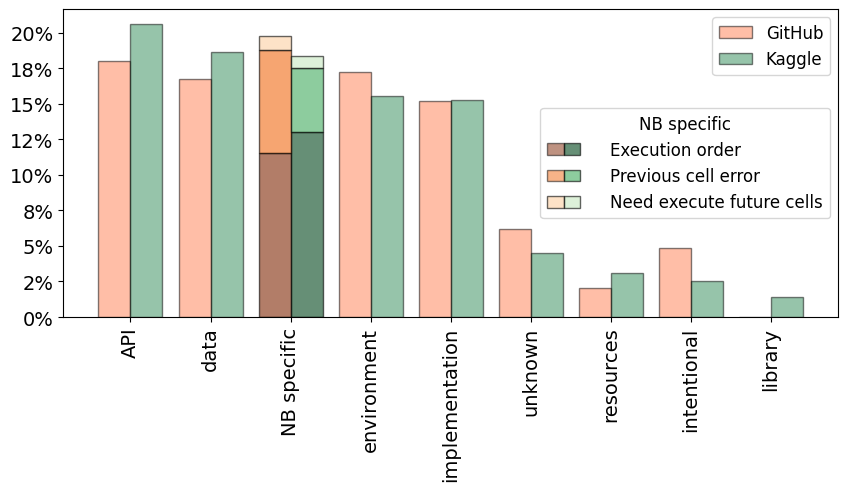

In [15]:
from matplotlib.ticker import PercentFormatter

# plot
ind = np.arange(len(rc_plot.index))

width = 0.4
fontsize = 16
fig = plt.figure(figsize=(10,4))
plt.bar(ind - width / 2, rc_plot.GitHub, width, label = 'GitHub', alpha = 0.5, color = 'coral', edgecolor = 'black') 
plt.bar(ind + width / 2, rc_plot.Kaggle, width, label = 'Kaggle', alpha = 0.5, color = 'seagreen', edgecolor = 'black')

# np specific
npspe_list = nb_pp.T.index
weight_count_g = nb_pp.T["GitHub"]*rc_nb_g/100
weight_count_k = nb_pp.T["Kaggle"]*rc_nb_k/100
bottom_g, bottom_k = 0,0
for i in range(len(npspe_list)):
    plt.bar(2 - width / 2, weight_count_g.iloc[i], width, alpha=0.6, color = cm_2(i*3), edgecolor = 'black',  bottom=bottom_g) 
    bottom_g += weight_count_g.iloc[i]
    plt.bar(2 + width / 2, weight_count_k.iloc[i], width, alpha=0.6, color = cm(i*3), edgecolor = 'black',  bottom=bottom_k) 
    bottom_k += weight_count_k.iloc[i]
    
plt.xticks(ind, rc_plot.index, rotation=90, fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)

fig.axes[0].yaxis.set_major_formatter(PercentFormatter(decimals=0))
# plt.xlabel("Exception types", fontsize=fontsize) 
# plt.ylabel("Percentage of errors", fontsize=fontsize) 

# np specific - add another legend
lgd_colors = [cm_2(i*3) for i in range(3)] + [cm(i*3) for i in range(3)]
lgd_labels=[""]*3+list(npspe_list)

lgnd = fig.axes[0].legend(labels=lgd_labels, loc="center right", ncols=2, fontsize=fontsize-4,columnspacing=-1.8, 
                          title="NB specific", title_fontsize=fontsize-4)
fig.axes[0].add_artist(lgnd)
i=0
for handle in lgnd.legend_handles:
    handle.set_width(12)
    handle.set_color(lgd_colors[i])
    handle.set_edgecolor("black")
    i+=1
        
# original legend   
plt.legend(fontsize=fontsize-4) 

plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/rc.pdf", bbox_inches='tight')
plt.show()

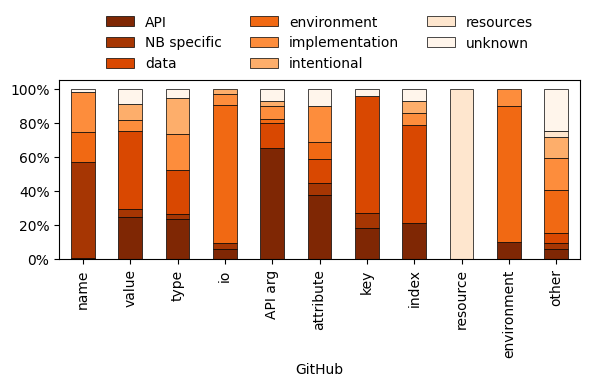

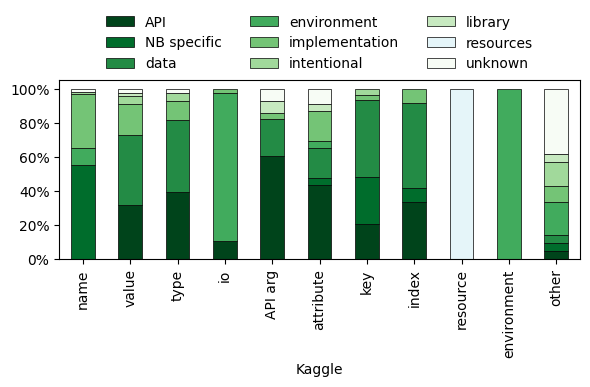

In [16]:
# relationship between exception types and root causes
import matplotlib.pyplot as plt
import matplotlib.colors as colors

rc2colormap = {"API":0,"NB specific":1,"data":2,"environment":3,
             "implementation":4,"intentional":5,"library":6,"resources":7,"unknown":8}

def plot_relationship_stackedbar_exp_rc(x_var, y_var, df, source="Kaggle",include_num=10):
    df_grouped = df.groupby(x_var)[y_var].value_counts().unstack(y_var)

    df_other = pd.DataFrame(df_grouped[~df_grouped.index.isin(df_cluster_res_exp_type_kg.index[:include_num])].sum(axis=0)).T.rename(index={0: "other"})
    df_grouped = pd.concat([df_grouped.loc[df_cluster_res_exp_type_kg.index[:include_num].to_list()], df_other])
    df_grouped = (df_grouped.T/df_grouped.sum(axis=1)*100).T

    cm_apply = cm if source=="Kaggle" else cm_2
    cmap = colors.ListedColormap([cm_apply(rc2colormap[x]) for x in df_grouped.columns])
    fig = df_grouped.plot.bar(stacked=True, cmap=cmap, edgecolor='black',linewidth=0.5,figsize=(6,4))
    plt.legend(bbox_to_anchor=(0.5, 1.02), loc="lower center", borderaxespad=0, frameon=False, ncol=3)
    plt.xlabel(source)
    fig.axes.yaxis.set_major_formatter(PercentFormatter())

    plt.tight_layout()
    plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/exp_rc"+source+".pdf", bbox_inches='tight')
    plt.show()
    
plot_relationship_stackedbar_exp_rc("label_refined_exp_type", "label_root_cause", df_mlerr_labels_g_sum, "GitHub")
plot_relationship_stackedbar_exp_rc("label_refined_exp_type", "label_root_cause", df_mlerr_labels_k_sum, "Kaggle")

In [1]:
# # plot nb specific
# ind = np.arange(len(nb_pp.index))

# width = 0.4
# fontsize = 16
# plt.figure(figsize=(6,4))
# plt.bar(ind - width / 2, nb_pp.GitHub, width, label = 'GitHub', alpha = 0.5, color = 'coral', edgecolor = 'black') 
# plt.bar(ind + width / 2, nb_pp.Kaggle, width, label = 'Kaggle', alpha = 0.5, color = 'seagreen', edgecolor = 'black') 
  
# plt.xticks(ind, nb_pp.index, rotation=90, fontsize=fontsize-2)
# plt.yticks(fontsize=fontsize-2)
# # plt.xlabel("Exception types", fontsize=fontsize) 
# plt.ylabel("Percentage of errors", fontsize=fontsize) 
# plt.legend(fontsize=fontsize) 
# plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/ml_pipeline.pdf", bbox_inches='tight')
# plt.show()

### rq2: To what extent are failures in ML/data science notebooks related to ML libraries?

In [17]:
mlbug = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_if_ML_bug'],
                   cluster_res_g_sum_weighted_sum['label_if_ML_bug']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
mlbug['Kaggle']=(mlbug['Kaggle']/mlbug['Kaggle'].sum()*100).round(2).astype(str) + '%'
mlbug['GitHub']=(mlbug['GitHub']/mlbug['GitHub'].sum()*100).round(2).astype(str) + '%'

mlbug.index=["ML bug", "Python bug", "Unknown"]
mlbug.index.name = 'If ML bug'
mlbug[["GitHub","Kaggle"]]

,GitHub,Kaggle
If ML bug,,
ML bug,58.61%,70.62%
Python bug,41.39%,29.1%
Unknown,0.0%,0.28%


In [18]:
# horizontal bar plots

# import matplotlib.pyplot as plt

# # plot stacked bar chart to compare GitHub and Kaggle over each categories
# for label_key in ['label_if_ML_bug']:
#     bar_label_key_gk = pd.DataFrame({"GitHub": cluster_res_g_sum_weighted_sum[label_key],
#                                      "Kaggle": cluster_res_k_sum_weighted_sum[label_key]})
#     bar_label_key_gk = bar_label_key_gk.div(bar_label_key_gk.sum(axis=0), axis=1)
#     # plot
#     ax = bar_label_key_gk.T.plot(kind="barh", stacked=True, figsize=(6,2), 
#                             colormap=cm_2, edgecolor='black',linewidth=0.5)
#     plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#     plt.title(label_key)
#     plt.show()

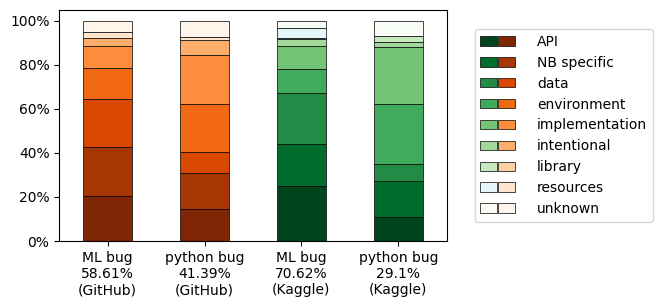

In [19]:
# relationship between ML bug/python bug and root causes

import matplotlib.pyplot as plt
import matplotlib.colors as colors

def plot_relationship_stackedbar_mlbug_rc(x_var, y_var, df_g, df_k):
    df_grouped_g = df_g.groupby(x_var)[y_var].value_counts().unstack(y_var)
    df_grouped_g = (df_grouped_g.T/df_grouped_g.sum(axis=1)*100).T
    df_grouped_g = df_grouped_g[~df_grouped_g.index.isin(["unknown"])]
    df_grouped_g.index=["ML bug\n58.61%", "python bug\n41.39%"]
    df_grouped_g.index = df_grouped_g.index + "\n(GitHub)"
    
    df_grouped_k = df_k.groupby(x_var)[y_var].value_counts().unstack(y_var)
    df_grouped_k = (df_grouped_k.T/df_grouped_k.sum(axis=1)*100).T
    df_grouped_k = df_grouped_k[~df_grouped_k.index.isin(["unknown"])]
    df_grouped_k.index=["ML bug\n70.62%", "python bug\n29.1%"]
    df_grouped_k.index = df_grouped_k.index + "\n(Kaggle)"
    
    df_grouped = pd.concat([df_grouped_k, df_grouped_g])
    df_grouped = df_grouped.reindex(df_grouped.index[[2,3,0,1]])
    
    df_grouped_kp = df_grouped.copy()
    df_grouped_kp.iloc[[0,1]] = 0
    df_grouped_gp = df_grouped.copy()
    df_grouped_gp.iloc[[2,3]] = 0
    
    cmap_g = colors.ListedColormap([cm_2(rc2colormap[x]) for x in df_grouped.columns])
    cmap_k = colors.ListedColormap([cm(rc2colormap[x]) for x in df_grouped.columns])

    fig, ax = plt.subplots(figsize=(5,3))
    df_grouped_kp.plot.bar(stacked=True, cmap=cmap_k, edgecolor='black',linewidth=0.5, ax=ax)
    df_grouped_gp.plot.bar(stacked=True, cmap=cmap_g, edgecolor='black',linewidth=0.5, ax=ax)

    handles, previous_labels = ax.get_legend_handles_labels()
    for i in range(9):
        previous_labels[i]="" 
    
    lgnd = plt.legend(labels=previous_labels, bbox_to_anchor=(1.55, 0.5), loc="right", frameon=True, ncol=2,columnspacing=-1.5)
    for handle in lgnd.legend_handles:
        handle.set_width(12)
#     plt.xlabel(source)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.xticks(rotation=0)
    plt.xlabel(xlabel="")
    
    plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/mlbug_rc.pdf", bbox_inches='tight')
    plt.show()
    
plot_relationship_stackedbar_mlbug_rc("label_if_ML_bug", "label_root_cause", df_mlerr_labels_g_sum, df_mlerr_labels_k_sum)

### rq3: In which phases of ML development in notebooks are exceptions most likely to occur? 

In [20]:
order_mlpp = ["environment setup", "data preparation", "data visualization", "model construction", "training", 
              "evaluation/prediction", "no ML pipeline"]

df_mlpp = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_ML_pipeline'],
                     cluster_res_g_sum_weighted_sum['label_ML_pipeline']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
df_mlpp.index.name = "ML pipeline"
df_mlpp = df_mlpp.reindex(order_mlpp)
df_mlpp.loc['total']= df_mlpp.sum()
df_mlpp

,Kaggle,GitHub
ML pipeline,,
environment setup,19,31
data preparation,93,111
data visualization,43,40
model construction,32,20
training,68,50
evaluation/prediction,73,41
no ML pipeline,26,96
total,354,389


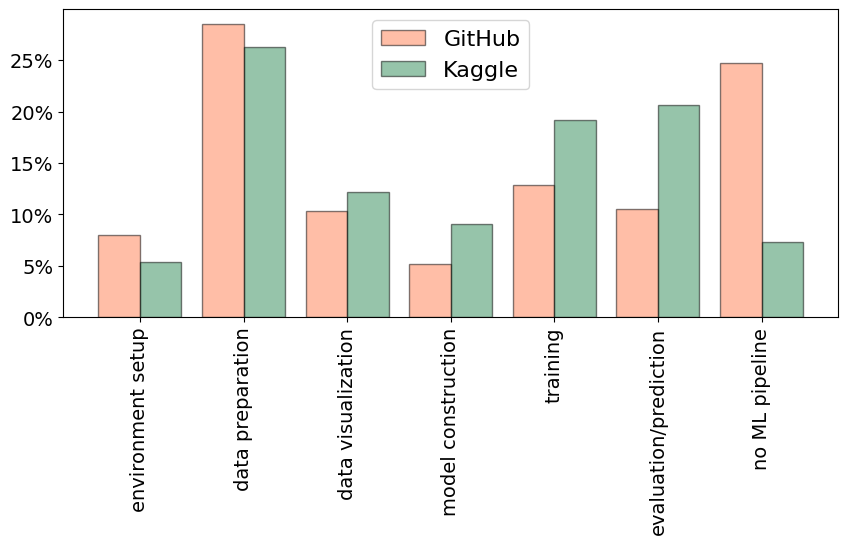

In [21]:
import numpy as np

mlpp = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_ML_pipeline'],
                     cluster_res_g_sum_weighted_sum['label_ML_pipeline']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
mlpp['Kaggle']=(mlpp['Kaggle']/mlpp['Kaggle'].sum()*100).round(2)
mlpp['GitHub']=(mlpp['GitHub']/mlpp['GitHub'].sum()*100).round(2)
mlpp = mlpp.reindex(order_mlpp)

ind = np.arange(len(mlpp.index))

width = 0.4
fontsize = 16
fig = plt.figure(figsize=(10,4))
plt.bar(ind - width / 2, mlpp.GitHub, width, label = 'GitHub', alpha = 0.5, color = 'coral', edgecolor = 'black') 
plt.bar(ind + width / 2, mlpp.Kaggle, width, label = 'Kaggle', alpha = 0.5, color = 'seagreen', edgecolor = 'black') 
fig.axes[0].yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.xticks(ind, mlpp.index, rotation=90, fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# plt.xlabel("Exception types", fontsize=fontsize) 
# plt.ylabel("Percentage of errors", fontsize=fontsize) 
plt.legend(fontsize=fontsize) 
plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/ml_pipeline.pdf", bbox_inches='tight')
plt.show()

# mlpp

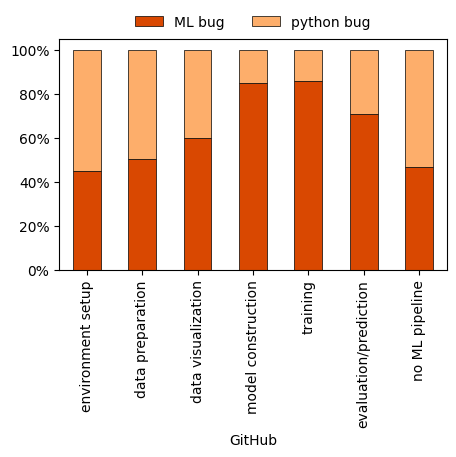

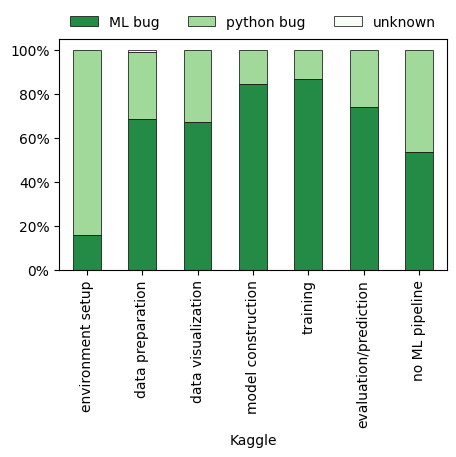

In [22]:
# relationship between ML pipeline and ML bug/python bug

import matplotlib.pyplot as plt
import matplotlib.colors as colors


mlbug2colormap = {"ML bug":2, "python bug":5, 'unknown':9}

def plot_relationship_stackedbar_mlpp_mlbug(x_var, y_var, df, source):
    df_grouped = df.groupby(x_var)[y_var].value_counts().unstack(y_var)
    df_grouped = (df_grouped.T/df_grouped.sum(axis=1)*100).T
    df_grouped = df_grouped.reindex(order_mlpp)
    
    cm_apply = cm if source=="Kaggle" else cm_2
    cmap = colors.ListedColormap([cm_apply(mlbug2colormap[x]) for x in df_grouped.columns])
    fig = df_grouped.plot.bar(stacked=True, cmap=cmap, edgecolor='black',linewidth=0.5,figsize=(5,3))
    plt.legend(bbox_to_anchor=(0.5, 1.02), loc="lower center", borderaxespad=0, frameon=False, ncol=3)
    plt.xlabel(source)
    fig.yaxis.set_major_formatter(PercentFormatter())
    plt.xticks(rotation=90)
    
    plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/mlpp_mlbug"+source+".pdf", bbox_inches='tight')
    plt.show()
    
plot_relationship_stackedbar_mlpp_mlbug("label_ML_pipeline", "label_if_ML_bug", df_mlerr_labels_g_sum, source="GitHub")
plot_relationship_stackedbar_mlpp_mlbug("label_ML_pipeline", "label_if_ML_bug", df_mlerr_labels_k_sum, source="Kaggle")